<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20Deployment/Course%203%20-%20TensorFlow%20Datasets/Week%201/Examples/horse-or-human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_addons as tfa

data = tfds.load('horses_or_humans', split='train', as_supervised=True)
val_data = tfds.load('horses_or_humans', split='test', as_supervised=True)

train_batches = data.shuffle(100).batch(32)
validation_batches = val_data.batch(32)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                                      input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_batches, epochs=10, validation_data=validation_batches, validation_steps=1)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteUHFV92/horses_or_humans-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteUHFV92/horses_or_humans-test.tfrecord


Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.
Epoch 1/10
33/33 [==============================] - 5s 138ms/step - loss: 5.5310 - accuracy: 0.7264 - val_loss: 0.3670 - val_accuracy: 0.9062
Epoch 2/10
33/33 [==============================] - 4s 129ms/step - loss: 0.1172 - accuracy: 0.9572 - val_loss: 0.3959 - val_accuracy: 0.9688
Epoch 3/10
33/33 [==============================] - 4s 130ms/step - loss: 0.0304 - accuracy: 0.9893 - val_loss: 0.5756 - val_accuracy: 0.9375
Epoch 4/10
33/33 [==============================] - 4s 130ms/step - loss: 0.0321 - accuracy: 0.9883 - val_loss: 0.4204 - val_accuracy: 0.9375
Epoch 5/10
33/33 [==============================] - 4s 129ms/step - loss: 0.0054 - accuracy: 0.9990 - val_loss: 0.7854 - val_accuracy: 0.9062
Epoch 6/10
33/33 [==============================] - 4s 127ms/step - loss: 9.4502e-04 - accuracy: 1.0000 - val_loss: 1.7130 - val_accuracy: 0.8438
Epo

## 查看数据集

In [3]:
data,info = tfds.load('horses_or_humans', split='train', with_info=True,as_supervised=True)

In [4]:
info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    version=3.0.0,
    description='A large set of images of horses and humans.',
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1283,
    splits={
        'test': 256,
        'train': 1027,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
    redistribution_info=,
)

(32, 300, 300, 3)
(32,)


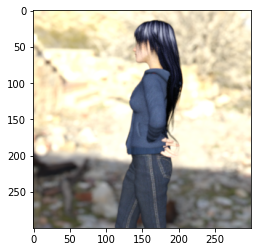

In [18]:
# check the dataset 
# 查看batch size = 32 中 一个元素
import matplotlib.pyplot as plt
for imgs, labels in train_batches.take(1):
  print(imgs.shape)
  print(labels.shape)
  # (32, 300, 300, 3)
  # (32,)
  image = imgs.numpy()[1,:,:,:]
  plt.imshow(image)
  plt.show()


In [ ]:
# 显示单通道灰度图代码
image = data["image"].numpy().squeeze()
label = data["label"].numpy()

print("Label: {}".format(label))
plt.imshow(image, cmap=plt.cm.binary)
plt.show()